In [2]:
import pickle
import numpy as np

In [3]:
with open('./train_meta_dict.pickle', 'rb') as f:
    train_meta_dict = pickle.load(f)

In [4]:
temp_key = list(train_meta_dict.keys())[77]
train_meta_dict[temp_key]

{'dim0': 2802,
 'dim1': 2666,
 'bbox': [[13, 'No finding', 14, nan, nan, nan, nan],
  [12, 'No finding', 14, nan, nan, nan, nan],
  [11, 'No finding', 14, nan, nan, nan, nan]]}

In [5]:
temp_key = list(train_meta_dict.keys())[77]

# label id
temp_lbl = np.array(train_meta_dict[temp_key]['bbox'])[:, 2]
temp = np.zeros((1, 15))
for i in temp_lbl:
    temp[0, int(i)] = 1
temp


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [6]:
temp.shape

(1, 15)

In [18]:
# Stratified CV
# 1. label id
# 2. rad id 

# 1 
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold


In [19]:

X = np.array(list(train_meta_dict.keys()))
Y = []

for val in train_meta_dict.values():
    temp_lbl = np.array(val['bbox'])[:, 2]
    temp = np.zeros((15))
    for i in temp_lbl:
        temp[int(i)] = 1
    Y.append(temp)
    # break
Y = np.array(Y)

In [20]:
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=30)

In [21]:
kfold = mskf.split(X, Y)

In [22]:
for fold, (train_index, val_index) in enumerate(kfold):
    X_train = X[train_index]
    X_val = X[val_index]
    Y_train = Y[train_index]
    Y_val = Y[val_index]
    print(sum(Y_train))
    print(sum(Y_val))

    # TODO: watch label distribution
    # break

[2453.  149.  361. 1840.  282.  309.  490. 1058.  660.  908.  826. 1584.
   77. 1293. 8484.]
[ 614.   37.   91.  460.   71.   77.  123.  264.  166.  226.  206.  397.
   19.  324. 2122.]
[2454.  148.  361. 1840.  283.  309.  491. 1057.  661.  907.  825. 1585.
   77. 1294. 8485.]
[ 613.   38.   91.  460.   70.   77.  122.  265.  165.  227.  207.  396.
   19.  323. 2121.]
[2453.  149.  362. 1840.  282.  309.  490. 1058.  661.  907.  826. 1585.
   76. 1293. 8485.]
[ 614.   37.   90.  460.   71.   77.  123.  264.  165.  227.  206.  396.
   20.  324. 2121.]
[2454.  149.  362. 1840.  282.  309.  491. 1057.  661.  907.  825. 1585.
   77. 1294. 8485.]
[ 613.   37.   90.  460.   71.   77.  122.  265.  165.  227.  207.  396.
   19.  323. 2121.]
[2454.  149.  362. 1840.  283.  308.  490. 1058.  661.  907.  826. 1585.
   77. 1294. 8485.]
[ 613.   37.   90.  460.   70.   78.  123.  264.  165.  227.  206.  396.
   19.  323. 2121.]


In [24]:
train_meta_dict[list(train_meta_dict.keys())[55]]

{'dim0': 2688,
 'dim1': 2208,
 'bbox': [[1, 'Pleural effusion', 10, 1909.0, 1696.0, 2026.0, 1933.0],
  [1, 'Aortic enlargement', 0, 1160.0, 853.0, 1458.0, 1224.0],
  [15, 'Aortic enlargement', 0, 1170.0, 850.0, 1470.0, 1223.0],
  [1, 'Pleural thickening', 11, 1909.0, 1696.0, 2026.0, 1933.0],
  [1, 'Consolidation', 4, 399.0, 1064.0, 817.0, 1442.0],
  [1, 'Nodule/Mass', 8, 399.0, 1064.0, 817.0, 1442.0],
  [16, 'Other lesion', 9, 1379.0, 1831.0, 2064.0, 2151.0],
  [16, 'Nodule/Mass', 8, 380.0, 1095.0, 821.0, 1466.0],
  [15, 'Cardiomegaly', 3, 768.0, 1640.0, 1778.0, 1997.0],
  [16, 'Lung Opacity', 7, 380.0, 1095.0, 821.0, 1466.0],
  [15, 'Nodule/Mass', 8, 435.0, 1088.0, 823.0, 1462.0],
  [1, 'Lung Opacity', 7, 399.0, 1064.0, 817.0, 1442.0],
  [16, 'Aortic enlargement', 0, 1154.0, 867.0, 1457.0, 1225.0],
  [16, 'Consolidation', 4, 380.0, 1095.0, 821.0, 1466.0]]}

In [25]:
print(list(train_meta_dict.keys())[:5])
print()
print(list(train_meta_dict.values())[:5])

['50a418190bc3fb1ef1633bf9678929b3', '21a10246a5ec7af151081d0cd6d65dc9', '9a5094b2563a1ef3ff50dc5c7ff71345', '051132a778e61a86eb147c7c6f564dfe', '063319de25ce7edb9b1c6b8881290140']

[{'dim0': 2580, 'dim1': 2332, 'bbox': [[2, 'No finding', 14, nan, nan, nan, nan], [6, 'No finding', 14, nan, nan, nan, nan], [7, 'No finding', 14, nan, nan, nan, nan]]}, {'dim0': 3159, 'dim1': 2954, 'bbox': [[14, 'No finding', 14, nan, nan, nan, nan], [4, 'No finding', 14, nan, nan, nan, nan], [9, 'No finding', 14, nan, nan, nan, nan]]}, {'dim0': 2336, 'dim1': 2080, 'bbox': [[1, 'Cardiomegaly', 3, 691.0, 1375.0, 1653.0, 1831.0], [16, 'Pleural effusion', 10, 1789.0, 1729.0, 1875.0, 1992.0], [16, 'Pleural thickening', 11, 1789.0, 1729.0, 1875.0, 1992.0], [16, 'Cardiomegaly', 3, 692.0, 1375.0, 1657.0, 1799.0], [15, 'Cardiomegaly', 3, 689.0, 1313.0, 1666.0, 1763.0], [16, 'Aortic enlargement', 0, 1052.0, 715.0, 1299.0, 966.0]]}, {'dim0': 2880, 'dim1': 2304, 'bbox': [[1, 'Aortic enlargement', 0, 1264.0, 743.0, 16

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import pickle
import matplotlib.patches as patches


In [27]:
with open("./train_meta_dict.pickle", "rb") as f:
    meta_dict = pickle.load(f)


In [30]:
temp_key = '051132a778e61a86eb147c7c6f564dfe'
temp = meta_dict[temp_key]

In [31]:
temp

{'dim0': 2880,
 'dim1': 2304,
 'bbox': [[1, 'Aortic enlargement', 0, 1264.0, 743.0, 1611.0, 1019.0],
  [15, 'Aortic enlargement', 0, 1305.0, 731.0, 1613.0, 1066.0],
  [15, 'Cardiomegaly', 3, 948.0, 1267.0, 2063.0, 1672.0],
  [16, 'Cardiomegaly', 3, 962.0, 1331.0, 2035.0, 1624.0],
  [16, 'Pleural thickening', 11, 1592.0, 452.0, 1804.0, 604.0],
  [16, 'Aortic enlargement', 0, 1275.0, 729.0, 1612.0, 1066.0],
  [1, 'Cardiomegaly', 3, 952.0, 1317.0, 2033.0, 1723.0]]}

In [81]:
temp_img = cv2.imread(f'/data2/minki/kaggle/vinbigdata-cxr/png_1024/train/{temp_key}.png', -1)
bb = temp['bbox'][-1]
bx0, by0, bx1, by1 = [float(i) for i in bb[-4:]]
tb = [None, None, None, None]
pid_dim0 = temp["dim0"]
pid_dim1 = temp["dim1"]

tb[0] = int(bx0 / pid_dim0 * 1024)
tb[1] = int(by0 / pid_dim0 * 1024)
tb[2] = int(bx1 / pid_dim1 * 1024)
tb[3] = int(by1 / pid_dim1 * 1024)


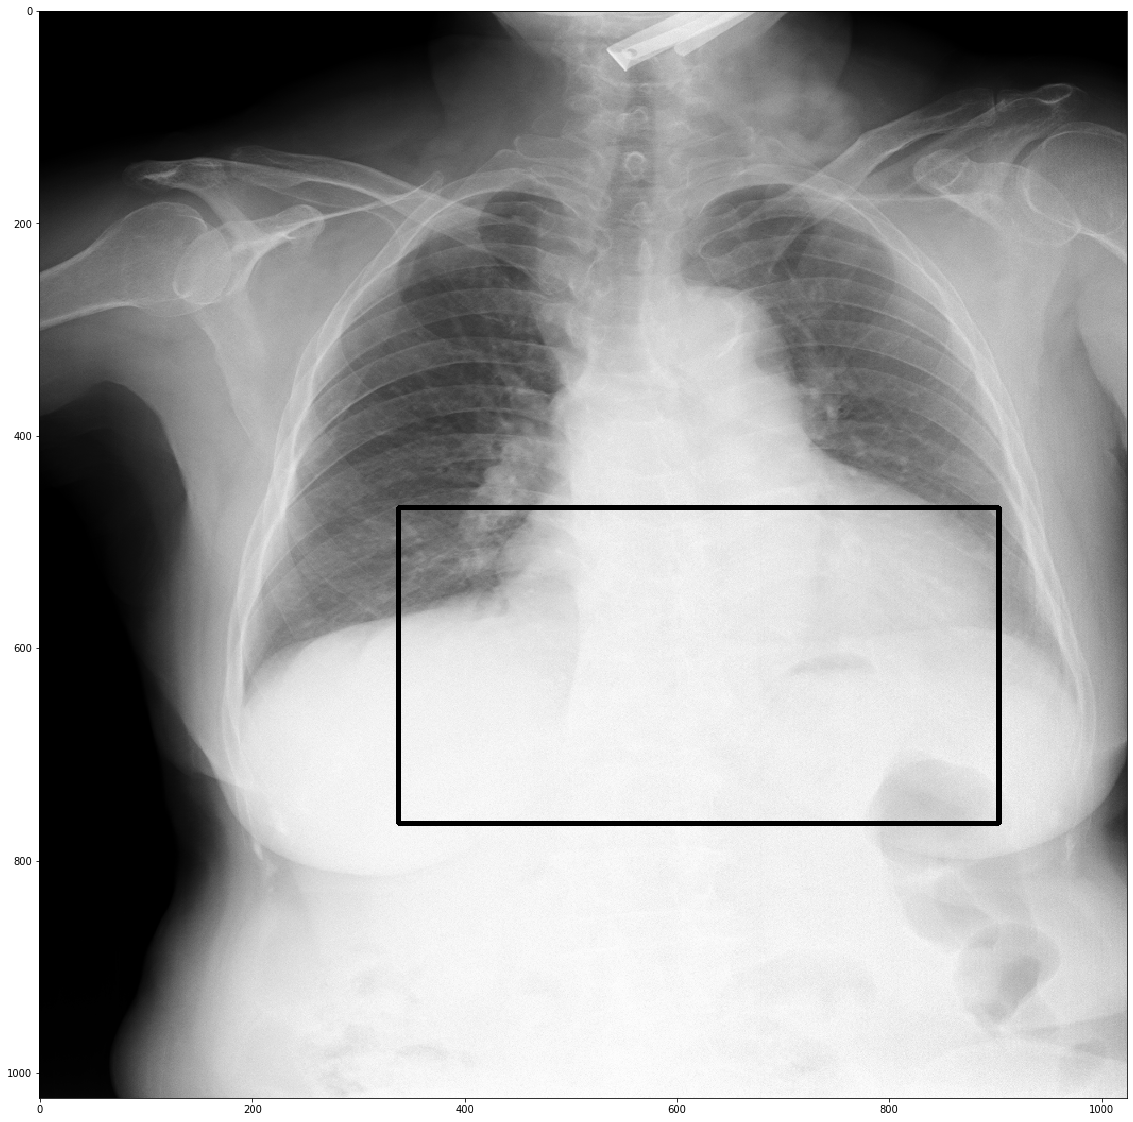

In [82]:
temp_img = cv2.rectangle(temp_img, (tb[0], tb[1]), (tb[2], tb[3]), color=(255,0,0), thickness=3)
fig, ax = plt.subplots(figsize = (20,20))

ax.imshow(temp_img, cmap=plt.get_cmap('gray'))

plt.show()